# Flight Fare Prediction


### 1) Problem statement

Travelling through flights has become an integral part of today’s lifestyle as more and
more people are opting for faster travelling options. The flight ticket prices increase or
decrease every now and then depending on various factors like timing of the flights,
destination, and duration of flights various occasions such as vacations or festive
season. Therefore, having some basic idea of the flight fares before planning the trip will
surely help many people save money and time.
The main goal is to predict the fares of the flights based on different factors available in
the provided dataset.

#### Approach

The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

### 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh
- The data consists of 12 column and 10684 rows.


#### 2.1 Importing Data and Required packages


In [1]:
# importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
import pandas as pd
import os
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')

#### 2.2 Importing data


In [2]:
load_dotenv()

secure_bundle = os.getenv('secure_bundle')
client_id = os.getenv('client_id')
client_secret = os.getenv('client_secret')

cloud_config= {
        'secure_connect_bundle': secure_bundle  
}

auth_provider = PlainTextAuthProvider(client_id, client_secret)
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()

train_df = pd.DataFrame(list(session.execute('SELECT * FROM flight_fare.data_train;')))

train_df.head()

#### Last 3 records


In [4]:
train_df.tail(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10680,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,09-05-2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,10:55,19:15,8h 20m,2 stops,No info,11753


#### Shape of the dataset


In [5]:
train_df.shape

(10683, 11)

- 1.Additional_Info -> Additional infomation about the flight.
- 2.Airline -> Airline name (Air India, IndiGo,...).
- 3.Arrival_Time -> Flight arrival time at desination.
- 4.Date_of_Journey -> Date of the journery.
- 5.Dep_Time -> Time of departure of the flight from source.
- 6.Destination -> Destination of the flight.
- 7.Duration -> Total duration of flight jounry to desination.
- 8.Price -> Price of the ticket of flight
- 9.Route -> Route of flight to reach desination.
- 10.Source -> Place of flight deprature.
- 11.Total_Stops -> Total number of stops taken by flight to reach desination.


### 3. Data checks to perform


- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column


### 3.1 Check missing values


In [6]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_df[train_df.isna().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,06-05-2019,Delhi,Cochin,NaN,09:45,07-05-2023 09:25,23h 40m,NaN,No info,7480


There are two missing values in Route and Total_Stops fields.Fortunately we have only one row with missing values therefore we can simply drop the row with missing values.


### 3.2 Check Duplicates


In [8]:
train_df.duplicated().value_counts()


False    10463
True       220
dtype: int64

There are 222 duplicate rows in our data


### 3.3 Check Data types


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### 3.4 Checking uniqe values of columns


In [10]:
train_df.nunique()

Airline              12
Date_of_Journey      40
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

So there are 12 unique Airlines, 5 sources, 6 destinations


### 3.5 Check statistics of data set


In [11]:
train_df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

- Minimum price/fare for all flights is 1759.
- Maximum price/fare for all flights is 79512.
- Avg price/fare for all flights is 9087.


#### 3.6 Check various categories present in the different categorical column

In [12]:
print("Categories in 'Airline' variable:",len(train_df['Airline'].unique()))
print(train_df['Airline'].unique())
print()

print("Categories in 'Source' variable:",len(train_df['Source'].unique()))
print(train_df['Source'].unique())
print()

print("Categories in 'Destination' variable:",len(train_df['Destination'].unique()))
print(train_df['Destination'].unique())
print()

print("Categories in 'Total_Stops' variable:",len(train_df['Total_Stops'].unique()))
print(train_df['Total_Stops'].unique())
print()

print("Categories in 'Additional_Info' variable:",len(train_df['Additional_Info'].unique()))
print(train_df['Additional_Info'].unique())
print()


Categories in 'Airline' variable: 12
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']

Categories in 'Source' variable: 5
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']

Categories in 'Destination' variable: 6
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']

Categories in 'Total_Stops' variable: 6
['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']

Categories in 'Additional_Info' variable: 10
['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']



### 4. Data Cleaning


#### 4.1 Handling missing values

In [13]:
train_df.dropna(inplace=True)
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#### 4.2 Changing datatype of Date_of_Journey, Dep_Time, Arrival_Time columns to datetime

In [14]:
def changeToDatetime(col):
    train_df[col]=pd.to_datetime(train_df[col])

In [15]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    changeToDatetime(i)

In [16]:
train_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [17]:
train_df['journey_day']= train_df['Date_of_Journey'].dt.day
train_df['journey_month']= train_df['Date_of_Journey'].dt.month

In [18]:
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2023-08-08 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2023-08-08 05:50:00,2023-08-08 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2023-08-08 09:25:00,2023-10-06 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU ? NAG ? BLR,2023-08-08 18:05:00,2023-08-08 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR ? NAG ? DEL,2023-08-08 16:50:00,2023-08-08 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [19]:
train_df.drop('Date_of_Journey', axis=1, inplace=True)

#### 4.3 Now We will extract hour and minutes from Arrival_time and Dept_time features and store in new columns and drop these columns

In [20]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [21]:
# Extractig depraure hour and minutes from Dep_Time 
extract_hour(train_df,'Dep_Time')
extract_min(train_df,'Dep_Time')
# Extractig depraure hour and minutes from Arrival_Time 
extract_hour(train_df,'Arrival_Time')
extract_min(train_df,'Arrival_Time')
# Dropping Dep_Time, Arrival_Time columns
drop_col(train_df,'Dep_Time')
drop_col(train_df,'Arrival_Time')

In [22]:
train_df.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [23]:
# Converting string into 24 hour format
duration = list(train_df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(" "))==2:
        pass
    else:
        if "h" in duration[i]:
            duration[i] = duration[i]+" 0m"
        else:
            duration[i] = "0h "+duration[i] 

In [24]:
train_df['Duration'] = duration

In [25]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [26]:
def dur_hour(x):
    return x.split(" ")[0][0:-1]

def dur_minutes(x):
    return x.split(" ")[1][0:-1]

In [27]:
# Extracting Duration Hours
train_df["Dur_hours"] = train_df["Duration"].apply(dur_hour)
# Extracting Duration Minutes
train_df["Dur_mins"] = train_df["Duration"].apply(dur_minutes)
# Dropping Duration column
drop_col(train_df,'Duration')

In [28]:
train_df.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Dur_hours,Dur_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [29]:
train_df['Dur_hours'] = train_df['Dur_hours'].astype(int)
train_df['Dur_mins'] = train_df['Dur_mins'].astype(int)

In [30]:
train_df.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Dep_Time_min          int64
Arrival_Time_hour     int64
Arrival_Time_min      int64
Dur_hours             int32
Dur_mins              int32
dtype: object

## 5. Exploring Data


In [31]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot: xlabel='Airline', ylabel='count'>

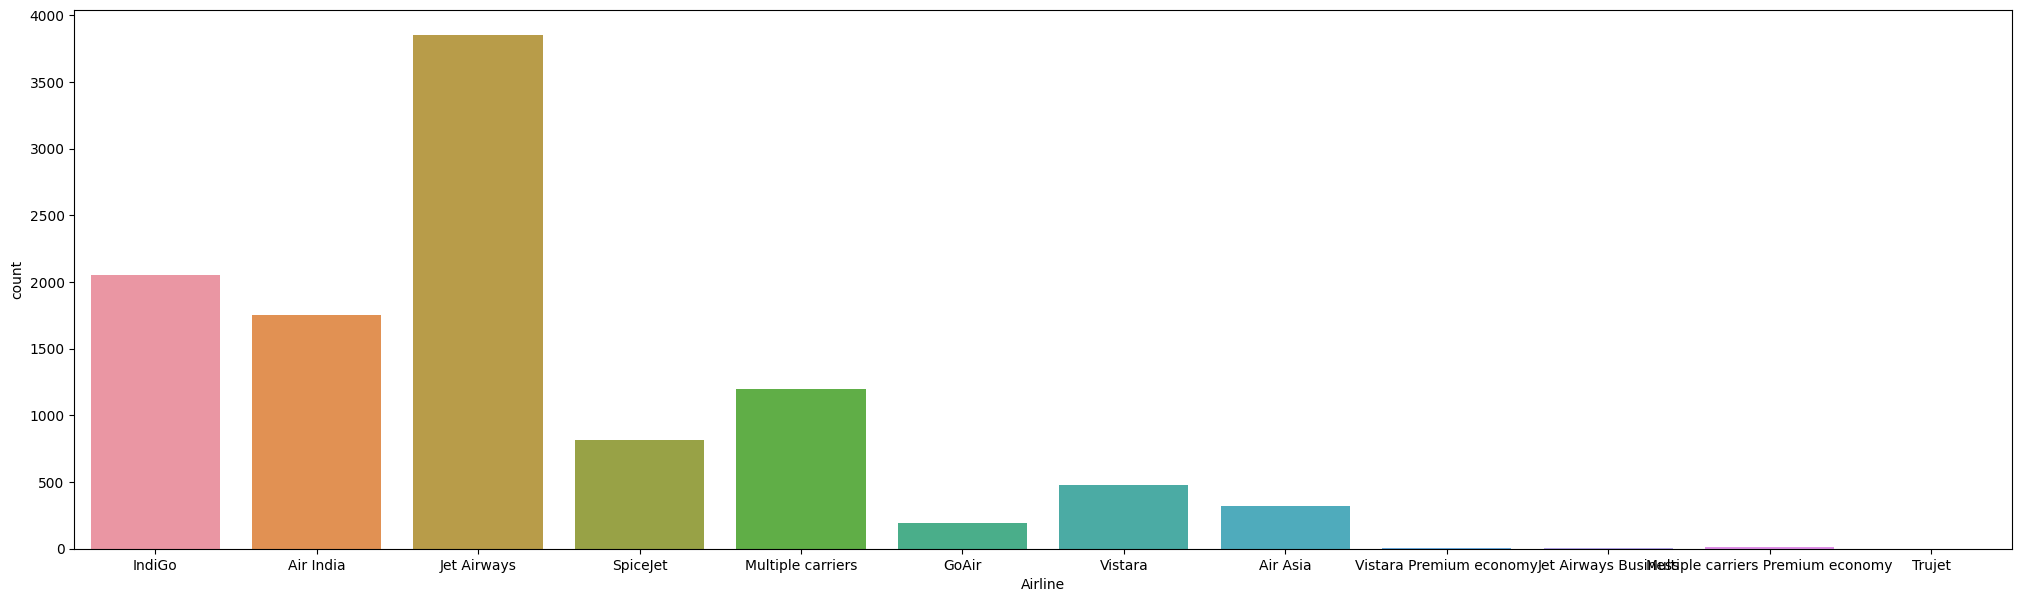

In [32]:
plt.figure(figsize=(25,7))
sns.countplot(x = 'Airline', data = train_df)

Number of flights of Multiple carriers Premium economy, Jet Airways Business, Vistara Premium economy, Trujet  are nearly Negliable

#### Top Cheaptest Airlines


In [33]:
train_df.groupby("Airline").min()["Price"].sort_values(ascending=True)

Airline
SpiceJet                              1759
Jet Airways                           1840
Air India                             2050
IndiGo                                2227
Air Asia                              3383
GoAir                                 3398
Vistara                               3687
Trujet                                4140
Multiple carriers                     5797
Vistara Premium economy               5969
Multiple carriers Premium economy     9845
Jet Airways Business                 46490
Name: Price, dtype: int64

#### Top Expensive Airlines


In [34]:
train_df.groupby("Airline").max()["Price"].sort_values(ascending=False)

Airline
Jet Airways Business                 79512
Jet Airways                          54826
Multiple carriers                    36983
Air India                            31945
SpiceJet                             23267
GoAir                                22794
IndiGo                               22153
Vistara                              21730
Multiple carriers Premium economy    14629
Air Asia                             13774
Vistara Premium economy              11793
Trujet                                4140
Name: Price, dtype: int64

#### Avg fare of Airline


In [35]:
train_df.groupby("Airline").mean()["Price"].sort_values(ascending=True)

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

#### Fare vs Airline

<AxesSubplot: xlabel='Airline', ylabel='Price'>

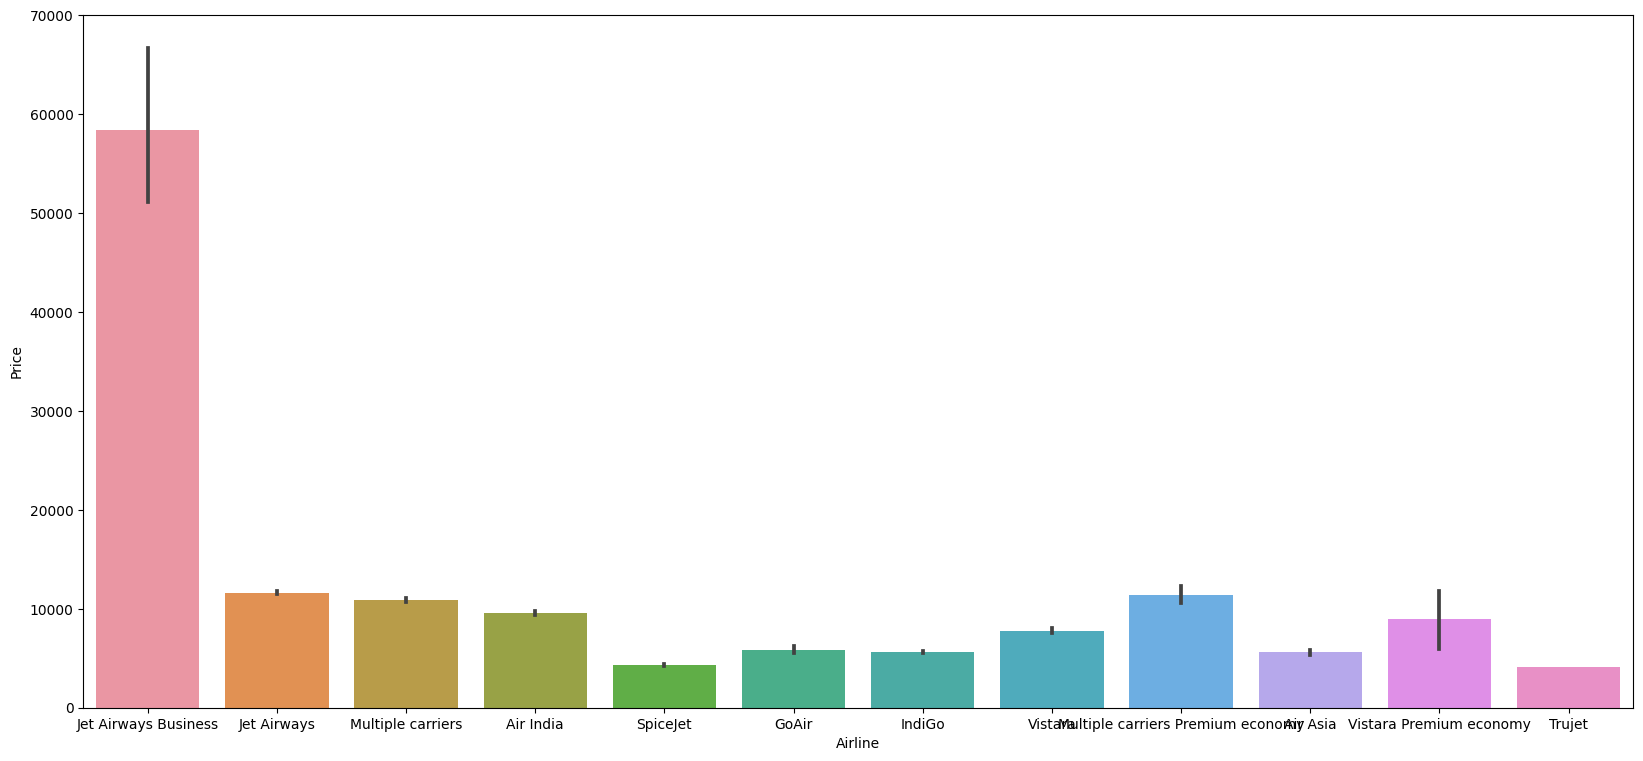

In [36]:
plt.figure(figsize=(20,9))
sns.barplot(x = 'Airline', y ='Price', data = train_df.sort_values('Price',ascending=False))

- As we can see jet Airways Business is the most expensive flight while other airlines has relatively similar median to each other


#### Additional Information vs Price/Fare

<AxesSubplot: xlabel='Additional_Info', ylabel='Price'>

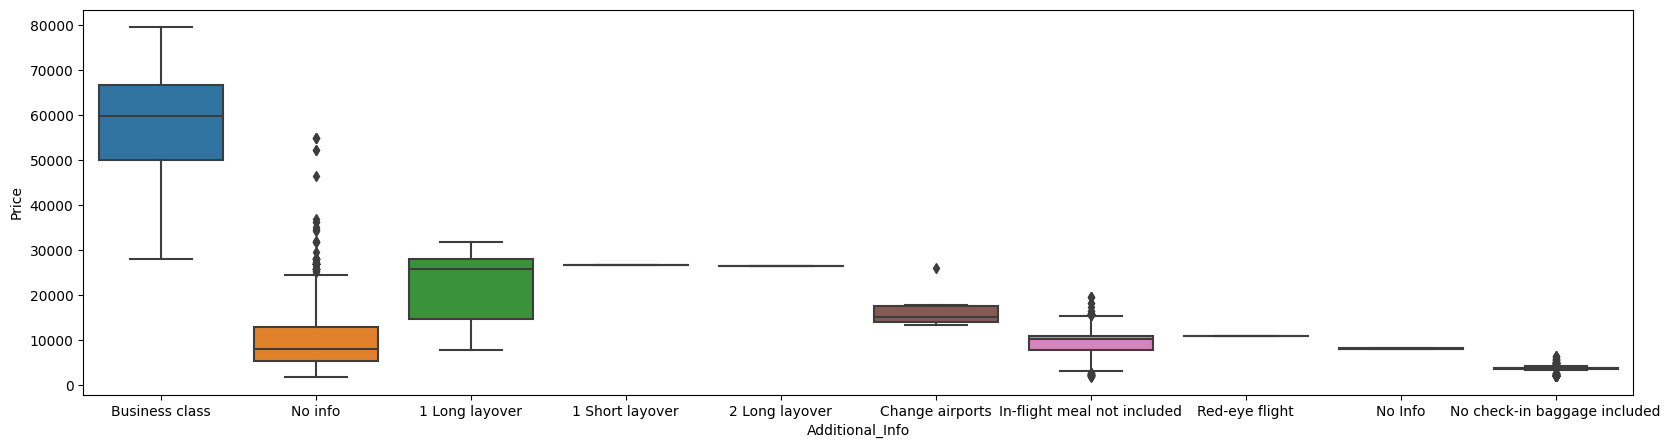

In [37]:
plt.figure(figsize=(20,5))
sns.boxplot(x = 'Additional_Info', y ='Price', data = train_df.sort_values('Price',ascending=False))

- From above we can see Business class is very expensive.
- long layover can be both expensive and cheap.
- flights whithout meals are cheap.
- Red-eye flights are also cleap.
- Flights with No check-in baggage are cheap which is also obivous.

#### Total Stops vs Price

In [38]:
train_df.groupby("Total_Stops").mean()["Price"].sort_values(ascending=True)

Total_Stops
non-stop     5024.900315
1 stop      10594.123556
2 stops     12715.807895
3 stops     13112.000000
4 stops     17686.000000
Name: Price, dtype: float64

<AxesSubplot: xlabel='Total_Stops', ylabel='Price'>

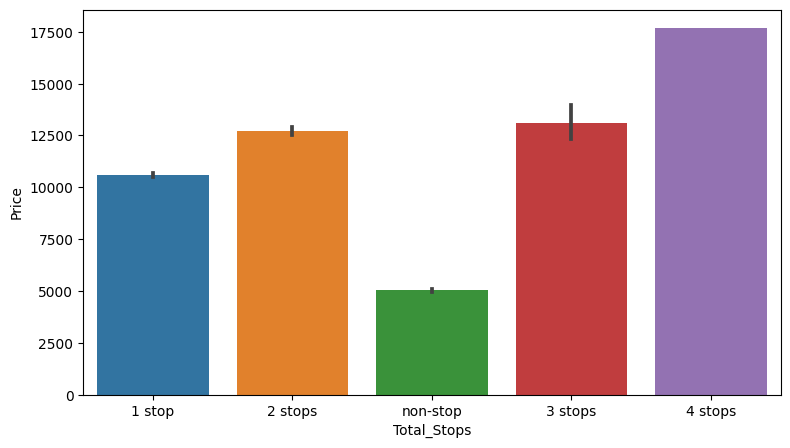

In [39]:
plt.figure(figsize=(9,5))
sns.barplot(x = 'Total_Stops', y ='Price', data = train_df.sort_values('Price',ascending=False))

As we can see Price/Fare grows as number of stops grows in journey 

#### Flights Per month

Text(0, 0.5, 'Count of flights')

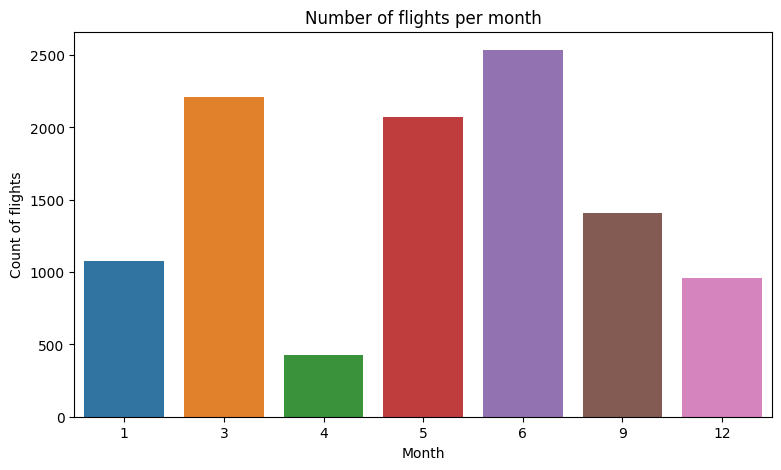

In [40]:
plt.figure(figsize=(9,5))
plt.title('Number of flights per month')
sns.countplot(x='journey_month', data=train_df)
plt.xlabel('Month')
plt.ylabel('Count of flights')

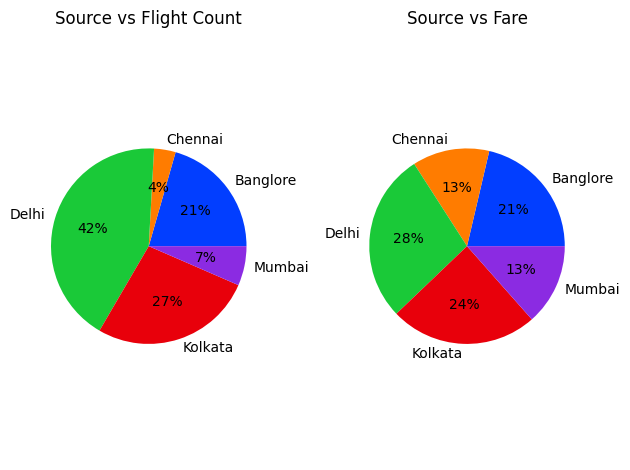

In [41]:
# declaring data

plt.subplot(1,2,1)
palette_color = sns.color_palette('bright')

data = train_df.groupby("Source").count()["Price"].values
keys = train_df.groupby("Source").count()["Price"].keys()
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Source vs Flight Count')

plt.subplot(1,2,2)
data = train_df.groupby("Source").mean()["Price"].values
keys = train_df.groupby("Source").mean()["Price"].keys()
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Source vs Fare')

# displaying chart
plt.tight_layout()
plt.show()

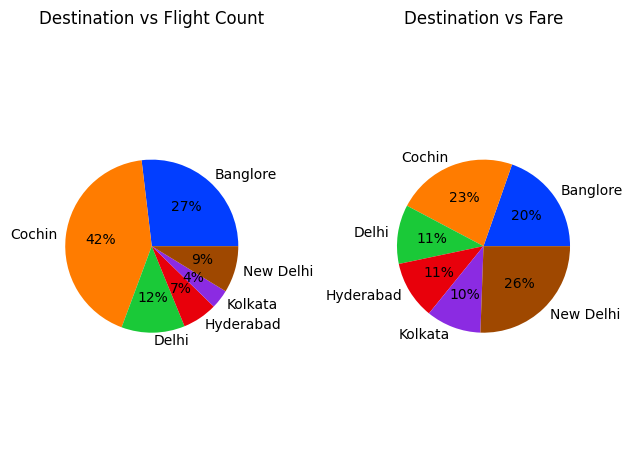

In [42]:
# declaring data

plt.subplot(1,2,1)
palette_color = sns.color_palette('bright')

data = train_df.groupby("Destination").count()["Price"].values
keys = train_df.groupby("Destination").count()["Price"].keys()
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Destination vs Flight Count')

plt.subplot(1,2,2)
data = train_df.groupby("Destination").mean()["Price"].values
keys = train_df.groupby("Destination").mean()["Price"].keys()
# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Destination vs Fare')

# displaying chart
plt.tight_layout()
plt.show()

<AxesSubplot: ylabel='Price'>

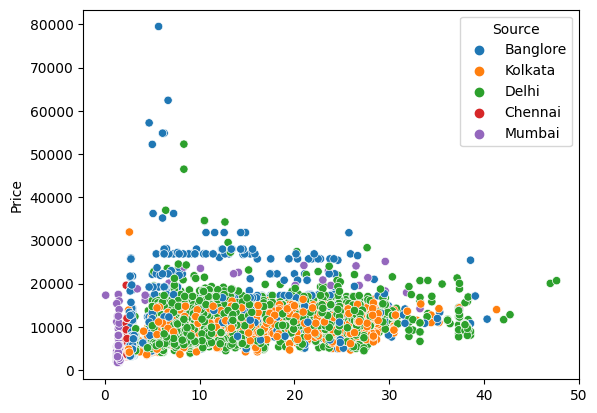

In [43]:
durationMins = (train_df["Dur_hours"]*60)+train_df["Dur_mins"] # duration in minutes
durationHours = (train_df["Dur_hours"])+(train_df["Dur_mins"]/60) # duration in minutes

sns.scatterplot(x = durationHours, y = train_df["Price"], data = train_df, hue="Source" )

There isn't a direct relation between duration and price which means other factors might affect duration and price correlation but Flights from banglore is very expensive from which I think that duratation has other dependent factors like total stops. 

<AxesSubplot: ylabel='Price'>

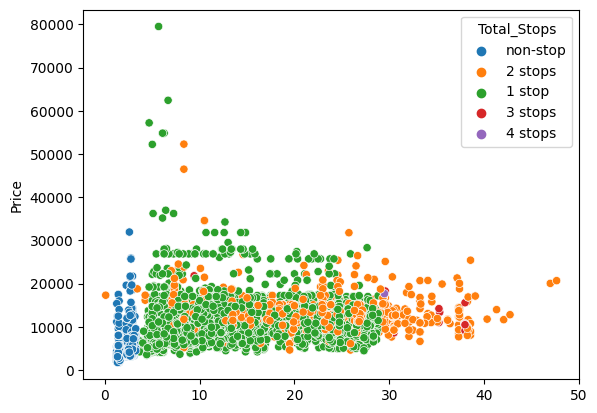

In [44]:
sns.scatterplot(x = durationHours, y = train_df["Price"], data = train_df, hue="Total_Stops" )

- From above we can say that direct flights to large distance between source and desination are expensive.
- Where as direct flight to short distanc with less distance is not expensive.
- Flights with less distance but more stops are also expensive. 

<AxesSubplot: ylabel='Price'>

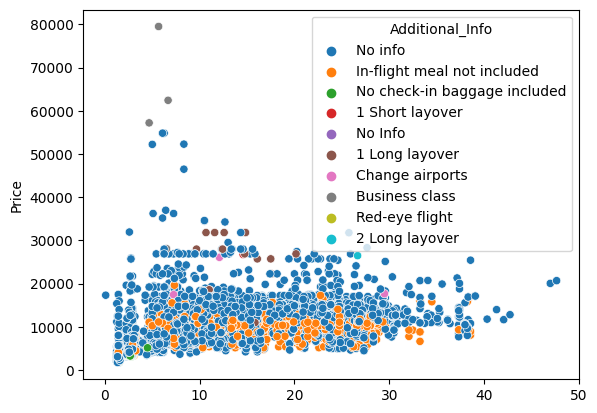

In [45]:
sns.scatterplot(x = durationHours, y = train_df["Price"], data = train_df, hue="Additional_Info" )

filghts with no In-flight meal, no check-in baggage, 1 Short layover are not much expensive. However business-class flights, 1 long layover flights are expensive. 

## 5. Conclusion

- Jet Airways Business is the most expensive flight while other airlines have median.
- Business class is very expensive,long layover can be both expensive and cheap, flights whithout meals are cheap, Red-eye flights are also cleap, Flights with No check-in baggage are .
- Fare increases as number of stops increases in journey.
- direct flights to large distance between source and desination are expensive